<a href="https://colab.research.google.com/github/Seongjin1225/AI_SCHOOL_9/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D/11%EC%9B%94%2009%EC%9D%BC/11%EC%9B%94_9%EC%9D%BC_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 판다스 문제풀이

In [ ]:
# address 열은 도로, 시, 주, 우편번호로 구성
# Street, City, State, Zip이라는 새로운 열에 할당 + 기존 Address 열 삭제

import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/customers.csv')
data.head()

data['Street'] = data['Address'].str.split(',').str[0]
data['City'] = data['Address'].str.split(',').str[1]
data['State'] = data['Address'].str.split(',').str[2]
data['ZIp'] =data['Address'].str.split(',').str[-1]
data.drop('Address',axis=1,inplace=True)
data.head()

# 강사님 ver.
data['Address'].str.split(',')

,Name,Street,City,State,ZIp
0,Frank Manning,6461 Quinn Groves,East Matthew,New Hampshire,16656
1,Elizabeth Johnson,1360 Tracey Ports Apt. 419,Kyleport,Vermont,31924
2,Donald Stephens,19120 Fleming Manors,Prestonstad,Montana,23495
3,Michael Vincent III,441 Olivia Creek,Jimmymouth,Georgia,82991
4,Jasmine Zamora,4246 Chelsey Ford Apt. 310,Karamouth,Utah,76252


# 상위 10개 단어 워드클라우드 시각화

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


chandler : 3
new : 2
la : 2
vega : 2
customer : 2
rachel : 2
one : 1
monica : 1
get : 1
roommate : 1
pilot : 1
uncut : 1
version : 1
written : 1
marta : 1
kauffman : 1
david : 1
crane : 1
transcribed : 1
guineapig : 1
additional : 1
transcribing : 1
eric : 1
aasen : 1
note : 1
previously : 1
unseen : 1
part : 1
epi : 1
scene : 1
central : 1
perk : 1
joey : 1
phoebe : 1
kid : 1
dream : 1
ahh : 1
miss : 1
coffee : 1
ugh : 1


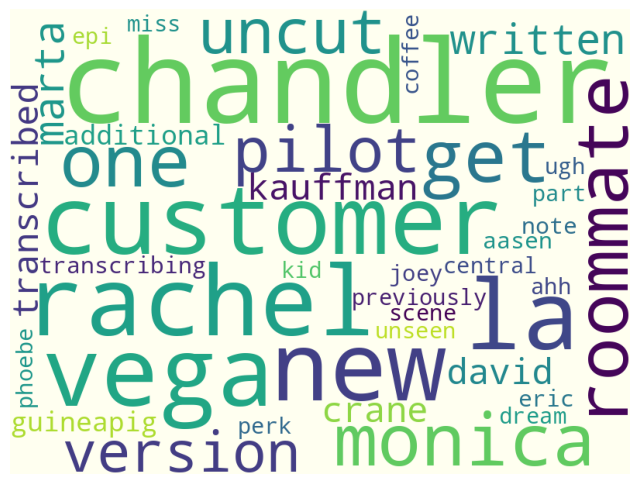

In [ ]:
import pandas as pd
import re
import nltk

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from collections import Counter

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

text = pd.read_table('/content/drive/MyDrive/AI스쿨 파일/friends101.txt')

stopWords = set(stopwords.words("english"))
lemma = WordNetLemmatizer()

EnWords = re.sub(r"[^a-zA-Z]+", " ", str(text))  # 알파뱃으로 시작하지 않는 단어 공백으로 처리
EnWordsToken = word_tokenize(EnWords.lower())  # 소문자로 변환한 단어 토큰화
EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords]  # 단어토큰이 불용어가 아닐 경우 리스트에 추가
words = [lemma.lemmatize(w) for w in EnWordsTokenStop]  #

count = Counter(words)

word_count = dict()

for tag, counts in count.most_common(40):  # 빈도수가 높은 50개의 단어
    if(len(str(tag))>1):  # 단어의 길이가 1 이상인 것만
        word_count[tag] = counts  # 딕셔너리에 저장
        print("%s : %d" % (tag, counts))

stopwords=set(STOPWORDS)
wc=WordCloud(background_color='ivory', stopwords=stopwords, width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

# 오후 진도(커피빈)